## MNIST classification

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Reshape train and test images
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [5]:
print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('Target classes:', np.unique(y_train))

X train shape: (60000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)
Target classes: [0 1 2 3 4 5 6 7 8 9]


In [6]:
#normalise pixel values (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
#defining model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

c:\Users\Akhila\Desktop\lancs\LUMS\Careers\MachineLearning\DeepLearning_Practice\imageClassification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8553 - loss: 0.4495
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9731 - loss: 0.0899
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9816 - loss: 0.0613
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9858 - loss: 0.0470
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9877 - loss: 0.0395
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9900 - loss: 0.0336
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9917 - loss: 0.0280
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9922 - loss: 0.0248
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9925 - loss: 0.0217
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9930 - loss: 0.0210


In [11]:
hist.history

{'accuracy': [0.9310333132743835,
  0.9748166799545288,
  0.9817833304405212,
  0.9852333068847656,
  0.9877333045005798,
  0.9894999861717224,
  0.9911666512489319,
  0.9917666912078857,
  0.9922333359718323,
  0.9931666851043701],
 'loss': [0.22347991168498993,
  0.08478835225105286,
  0.0614524744451046,
  0.048937488347291946,
  0.04081610217690468,
  0.0346522182226181,
  0.0299958698451519,
  0.02654562145471573,
  0.023468106985092163,
  0.020650597289204597]}

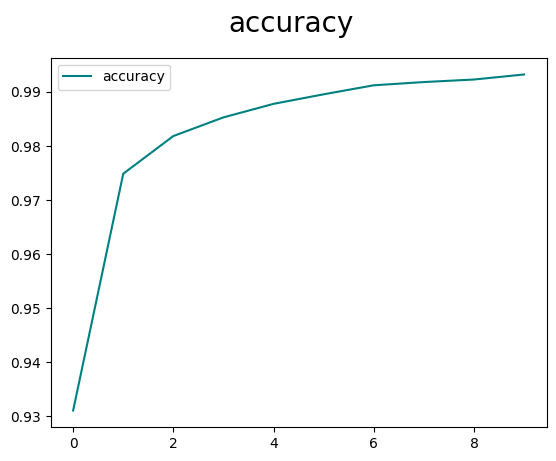

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

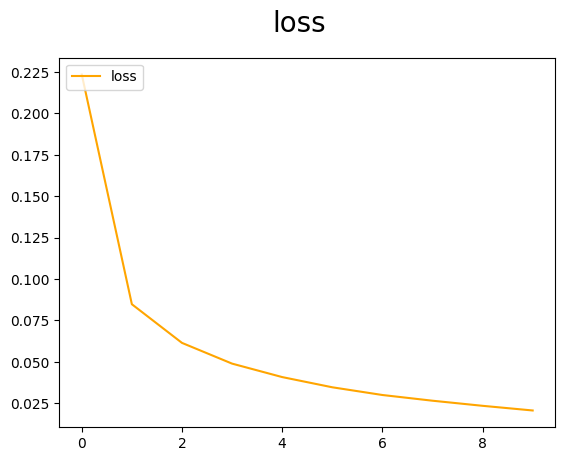

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'orange', label = 'loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [27]:
#evaluting the model
score = model.evaluate(X_test,y_test)
print(f'Accuracy: {round(score[1]*100, 2)}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0388
Accuracy: 99.13%
